**What are Hyperparameters?**
- Hyperparameters are the knobs and dials you can adjust to optimize the performance of a neural network.
- Learning Rate
- Batch size
- Number of epochs
- Number of neurons in a layer


In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np



In [5]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0



In [6]:
# Function to create a model
def create_model(hidden_units, learning_rate):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(hidden_units, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [7]:
# Hyperparameter options
hidden_units_list = [32, 64, 128]
learning_rates = [0.001, 0.01, 0.1]

# Store results
results = {}

for hidden_units in hidden_units_list:
    for lr in learning_rates:
        print(f"Training with {hidden_units} hidden units and {lr} learning rate")
        model = create_model(hidden_units, lr)
        history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2, verbose=0)

        # Store accuracy
        val_accuracy = history.history['val_accuracy'][-1]
        results[(hidden_units, lr)] = val_accuracy

Training with 32 hidden units and 0.001 learning rate
Training with 32 hidden units and 0.01 learning rate
Training with 32 hidden units and 0.1 learning rate
Training with 64 hidden units and 0.001 learning rate
Training with 64 hidden units and 0.01 learning rate
Training with 64 hidden units and 0.1 learning rate
Training with 128 hidden units and 0.001 learning rate
Training with 128 hidden units and 0.01 learning rate
Training with 128 hidden units and 0.1 learning rate


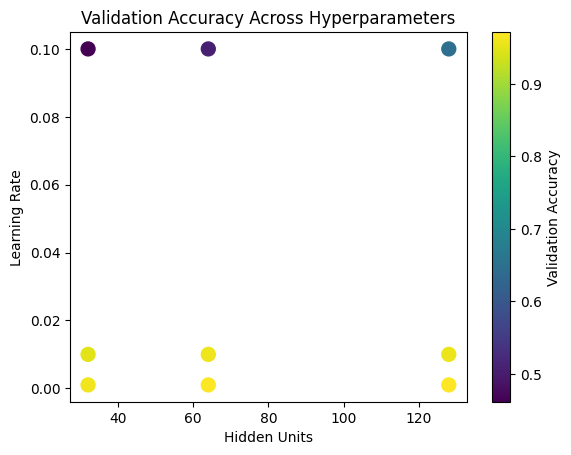

In [8]:
# Plot results
hidden_units, learning_rates, accuracies = zip(*[(k[0], k[1], v) for k, v in results.items()])
fig, ax = plt.subplots()
scatter = ax.scatter(hidden_units, learning_rates, c=accuracies, cmap='viridis', s=100)

ax.set_xlabel('Hidden Units')
ax.set_ylabel('Learning Rate')
ax.set_title('Validation Accuracy Across Hyperparameters')
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Validation Accuracy')
plt.show()
